In [176]:
class Option_Pricing:
    def __init__(self, S, K, Sigma, r, T):
        self.S = S 
        self.K = K 
        self.Sigma = Sigma
        self.r = r
        self.T = T
    def D1(self):
        from math import log, sqrt, exp
        D1 = (log(self.S / self.K) + (self.r + 0.5 * (self.Sigma ** 2)) * self.T) / (self.Sigma * sqrt(self.T))
        return(D1)
    def D2(self):
        from math import log, sqrt, exp
        from scipy import stats
        D1 = (log(self.S / self.K) + (self.r + 0.5 * (self.Sigma ** 2)) * self.T) / (self.Sigma * sqrt(self.T))
        D2 = D1 - self.Sigma * sqrt(self.T)
        return(D2)
    def BSM(self, type = 'Call'): #1是買權 0是賣權
        from math import log, sqrt, exp
        from scipy import stats
        if type == 'Call':
            C0 = self.S  * stats.norm.cdf(self.D1(), 0, 1) - self.K * exp(-self.r * self.T) * stats.norm.cdf(self.D2(), 0, 1)
            return(C0)
        elif type == 'Put':
            P0 = self.K * exp(-self.r * self.T) * stats.norm.cdf(-self.D2(), 0, 1) - self.S * stats.norm.cdf(-self.D1(), 0, 1)
            return(P0)
    def MCS(self, N = 100000, type = 'call'): 
        import numpy as np 
        z = np.random.standard_normal(N)
        ST = self.S * np.exp((self.r-0.5 * self.Sigma ** 2) * self.T + self.Sigma * np.sqrt(self.T) * z)
        if type == 'Call':
            CT = np.maximum(ST - self.K, 0)
            C0 = np.sum(np.exp(-self.r * self.T)* CT) / N
            return(C0)
        elif type == 'Put':
            PT = np.maximum(self.K - ST, 0)
            P0 = np.sum(np.exp(-self.r * self.T)* PT) / N
            return(P0)
    def display(self, type, res):
        print('標的價格：' + str(self.S) + '\n執行價：' + str(self.K) + '\nSigma:' + str(self.Sigma) + '\n無風險利率：' + str(self.r) + '\n期間：' + str(self.T) + '年到期')
        print('{Type}價格: {Res}'.format(Type=type, Res=str(res)))    # 新型態的輸出寫法 .format()
    def plot(self, type):
        import matplotlib.pyplot as plt
        import numpy as np
        %matplotlib inline
        Interval = 1000
        ST = np.arange(self.K - Interval, self.K + Interval)
        #Payoff_LongCall = np.maximum(ST - self.K, 0) - self.BSM('Call')  #Long Call
        #Payoff_ShortCall = - Payoff_LongCall                         #Short Call
        #Payoff_LongPut = np.maximum(self.K - ST, 0) - self.BSM("Put")    #Long Put
        #Payoff_ShortPut = - Payoff_LongPut
        plt.ylim(-1500,1500) #Y軸
        plt.xlim(self.K - Interval, self.K + Interval)
        if type == 'LongCall':
            Payoff_LongCall = np.maximum(ST - self.K, 0) - self.BSM('Call') 
            #Premium_Call = ('{:5.0f'}.format(self.BSM('Call')))
            Premium_Call = self.BSM('Call')
            plt.title('LongCall')
            plt.plot(ST, Payoff_LongCall, linewidth = 1)
            plt.axhline(0, color = 'r', ls= 'dashed')
            plt.axhline(0 - Premium_Call, color = 'k', ls= 'dashed')
            plt.axvline(K + Premium_Call, color = 'k', ls= 'dashed')
            plt.text(ST[0], -Premium_Call + 10, -Premium_Call, fontsize=10)
            plt.text(K + Premium_Call, 0, K + Premium_Call, fontsize=10)
            plt.text(self.K, 0, self.K, fontsize=10)
            #plt.axvline(K + Premium_Call, color = 'k', ls='--')
        elif type == 'ShortCall':
            Payoff_LongCall = np.maximum(ST - self.K, 0) - self.BSM('Call')  
            Payoff_ShortCall = - Payoff_LongCall
            Premium_Call = self.BSM('Call')
            plt.title('ShortCall')
            plt.plot(ST, Payoff_ShortCall, linewidth = 1)
            plt.axhline(0, color = 'R', ls= 'dashed')
            plt.axhline(0 + Premium_Call, color = 'K', ls= 'dashed')
            plt.axvline(K + Premium_Call, color = 'k', ls= 'dashed')
            plt.text(ST[0], Premium_Call + 10, Premium_Call, fontsize=10)
            plt.text(K + Premium_Call, 0, K + Premium_Call, fontsize=10)
            plt.text(self.K, 0, self.K, fontsize=10)
            #plt.axvline(K + Premium_Call, color = 'k', ls='--')
        elif type == 'LongPut':
            Payoff_LongPut = np.maximum(self.K - ST, 0) - self.BSM("Put")   
            Premium_Put = self.BSM('Put')
            plt.title('LongPut')
            plt.plot(ST, Payoff_LongPut, linewidth = 1)
            plt.axhline(0, color = 'r', ls= 'dashed')
            plt.axhline(0 - Premium_Put, color = 'k', ls= 'dashed')
            plt.axvline(K - Premium_Put, color = 'k', ls= 'dashed')
            plt.text(ST[0], -Premium_Put + 10, -Premium_Put, fontsize=10)
            plt.text(K - Premium_Put, 0, K - Premium_Put, fontsize=10)
            plt.text(self.K, 0, self.K, fontsize=10)
            #plt.axvline(K - Premium_Put, color = 'k', ls='--')
        else:
            Payoff_LongPut = np.maximum(self.K - ST, 0) - self.BSM("Put")   
            Payoff_ShortPut = - Payoff_LongPut
            Premium_Put = self.BSM('Put')
            plt.title('ShortPut')
            plt.plot(ST, Payoff_ShortPut, linewidth = 1)
            plt.axhline(0, color = 'R', ls= 'dashed')
            plt.axhline(0 + Premium_Put, color = 'K', ls= '--')
            plt.axvline(K - Premium_Put, color = 'k', ls= 'dashed')
            plt.text(ST[0], Premium_Put + 10, Premium_Put, fontsize=10)
            plt.text(K - Premium_Put, 0, K - Premium_Put, fontsize=10)
            plt.text(self.K, 0, self.K, fontsize=10)
            #plt.axvline(K - Premium_Put, color = 'k', ls='--')
        plt.axvline(K, color = 'k', ls='--')
        plt.show()

# .format
    https://pyformat.info/
    http://openhome.cc/Gossip/Python/StringFormat.html

In [177]:
S = 9000
K = 9100
Sigma = 0.2
r = 0.05
T = 0.5
Premium_Call = 179
Premium_Put = 185
OP = Option_Pricing(S, K, Sigma, r, T)

In [178]:
OP.BSM()
OP.display("Call", OP.BSM('Call'))

標的價格：9000
執行價：9100
Sigma:0.2
無風險利率：0.05
期間：0.5年到期
Call價格: 568.618601762


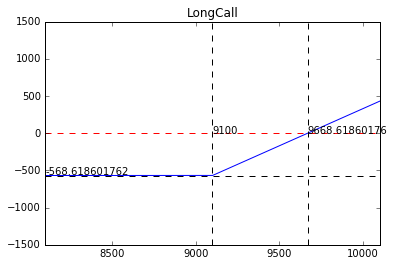

In [179]:
#LongCall
#ShortCall
#LongPut
#ShortPut
OP.plot('LongCall')

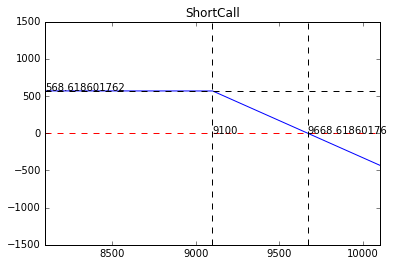

In [180]:
OP.plot('ShortCall')

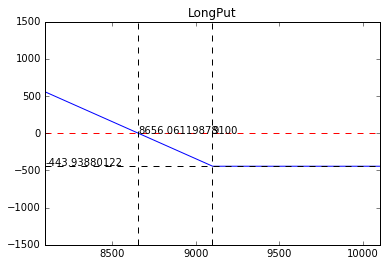

In [181]:
OP.plot('LongPut')

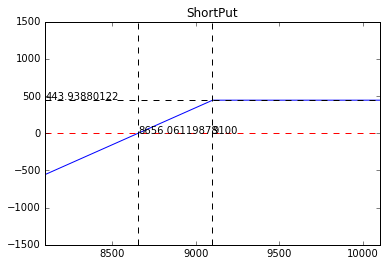

In [182]:
OP.plot('ShortPut')

1.字串執行
2.小數位